## Project Overview

***This project demonstrates a complete end-to-end data wrangling process using Python and Pandas on a bike-share dataset. Tasks included data inspection, cleaning missing fields, normalizing column names, converting datatypes, validating trip records, removing outliers, and engineering analytical features such as time-based breakdowns and trip categories.***

**About Bikeshare Data**

CapMetro Bikeshare (formerly MetroBike) in Austin is an e-bike sharing system offering electric-assist bikes for short trips, focused on last-mile connectivity with buses/rail, using an app for access, passes, and unlocking. Data involves trip records (start/end times, locations, duration), bike/station info, user demographics, and pricing. Key data points reflect usage patterns (popular times/routes), system health (battery/maintenance), and financial metrics, with recent changes increasing fares for better operations and docking.

**Importing library for analysis**

In [ ]:
import pandas as pd



**Overview of the Dataset**

*The Dataset contains 50000 rows with 10 columns*

In [ ]:
pd.read_csv('/content/sample_data/austin_bikeshare_trips.csv')

,trip_id,subscriber_type,bike_id,bike_type,start_time,start_station_id,start_station_name,end_station_id,end_station_name,duration_minutes
0,19309516,Single Trip,647,classic,2019-02-24 09:32:17 UTC,4051.0,10th & Red River,4051.0,10th & Red River,12
1,19309511,Single Trip,12802,classic,2019-02-24 09:31:03 UTC,4051.0,10th & Red River,4051.0,10th & Red River,8
2,19309522,Single Trip,046G,classic,2019-02-24 09:34:16 UTC,4051.0,10th & Red River,4051.0,10th & Red River,11
3,19346245,Local30,263G,classic,2019-03-08 07:37:03 UTC,4051.0,10th & Red River,4051.0,10th & Red River,50
4,19468664,24 Hour Walk Up Pass,2143,classic,2019-03-31 12:16:21 UTC,4051.0,10th & Red River,4051.0,10th & Red River,267
...,...,...,...,...,...,...,...,...,...,...
49995,5302125,24 Hour Walk Up Pass,924,classic,2015-06-14 15:42:53 UTC,2563.0,Rainey/Davis,2497.0,11th/Congress @ The Texas Capitol,22
49996,5157814,24 Hour Walk Up Pass,861,classic,2015-06-04 20:08:02 UTC,2563.0,Rainey/Davis,2497.0,11th/Congress @ The Texas Capitol,18
49997,5157804,24 Hour Walk Up Pass,827,classic,2015-06-04 20:07:22 UTC,2563.0,Rainey/Davis,2497.0,11th/Congress @ The Texas Capitol,19
49998,5088536,24 Hour Walk Up Pass,934,classic,2015-05-31 13:03:00 UTC,2563.0,Rainey/Davis,2497.0,11th/Congress @ The Texas Capitol,15


In [ ]:
bikeshare_data = pd.read_csv('/content/sample_data/austin_bikeshare_trips.csv')

In [ ]:
bikeshare_data.head()

,trip_id,subscriber_type,bike_id,bike_type,start_time,start_station_id,start_station_name,end_station_id,end_station_name,duration_minutes
0,19309516,Single Trip,647,classic,2019-02-24 09:32:17 UTC,4051.0,10th & Red River,4051.0,10th & Red River,12
1,19309511,Single Trip,12802,classic,2019-02-24 09:31:03 UTC,4051.0,10th & Red River,4051.0,10th & Red River,8
2,19309522,Single Trip,046G,classic,2019-02-24 09:34:16 UTC,4051.0,10th & Red River,4051.0,10th & Red River,11
3,19346245,Local30,263G,classic,2019-03-08 07:37:03 UTC,4051.0,10th & Red River,4051.0,10th & Red River,50
4,19468664,24 Hour Walk Up Pass,2143,classic,2019-03-31 12:16:21 UTC,4051.0,10th & Red River,4051.0,10th & Red River,267


**Getting Familiar with the dataset**

In [ ]:
bikeshare_data.columns

Index(['trip_id', 'subscriber_type', 'bike_id', 'bike_type', 'start_time',
       'start_station_id', 'start_station_name', 'end_station_id',
       'end_station_name', 'duration_minutes'],
      dtype='object')

In [ ]:
bikeshare_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   trip_id             50000 non-null  int64  
 1   subscriber_type     49808 non-null  object 
 2   bike_id             50000 non-null  object 
 3   bike_type           50000 non-null  object 
 4   start_time          50000 non-null  object 
 5   start_station_id    49983 non-null  float64
 6   start_station_name  50000 non-null  object 
 7   end_station_id      49191 non-null  float64
 8   end_station_name    50000 non-null  object 
 9   duration_minutes    50000 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 3.8+ MB


**Statistical Information of the Dataset**

In [ ]:
bikeshare_data.describe()

,trip_id,start_station_id,end_station_id,duration_minutes
count,5.000000e+04,49983.000000,49191.000000,50000.000000
mean,2.061512e+07,3230.491787,3361.201053,38.735440
std,9.132965e+06,1027.225877,1144.490004,197.530166
min,1.954839e+06,1007.000000,2494.000000,2.000000
25%,1.612823e+07,2539.000000,2497.000000,8.000000
50%,2.366079e+07,2570.000000,2561.000000,16.000000
75%,2.722677e+07,3797.000000,4051.000000,34.000000
max,3.386933e+07,7637.000000,7341.000000,19669.000000


**Checking for null values**

. Subscriber Type has 192 null values

. Start_station_id has 17 null values

. End_station_id has 809 null values



*How do we deal with this?*



*Stay tuned👌👌*







In [ ]:
bikeshare_data.isnull().sum()

,0
trip_id,0
subscriber_type,192
bike_id,0
bike_type,0
start_time,0
start_station_id,17
start_station_name,0
end_station_id,809
end_station_name,0
duration_minutes,0


*Checking the categories of subscriber type*

In [ ]:
bikeshare_data['subscriber_type']

,subscriber_type
0,Single Trip
1,Single Trip
2,Single Trip
3,Local30
4,24 Hour Walk Up Pass
...,...
49995,24 Hour Walk Up Pass
49996,24 Hour Walk Up Pass
49997,24 Hour Walk Up Pass
49998,24 Hour Walk Up Pass


In [ ]:
bikeshare_data['start_station_name']

,start_station_name
0,10th & Red River
1,10th & Red River
2,10th & Red River
3,10th & Red River
4,10th & Red River
...,...
49995,Rainey/Davis
49996,Rainey/Davis
49997,Rainey/Davis
49998,Rainey/Davis


**Making a Copy of the Dataset**

*As a data scientist, making a copy of the original dataset is the next step after getting an overview of the data*

In [ ]:
# Make a copy of the dataset
bikeshare_data_2 = bikeshare_data.copy()

**Cleaning Station names**



                                                                                   

In [ ]:
# Clean up common symbols like @, /
bikeshare_data_2['start_station_name'] = bikeshare_data_2['start_station_name'].str.replace('@', 'at')
bikeshare_data_2['start_station_name'] = bikeshare_data_2['start_station_name'].str.replace('/', ' ')
bikeshare_data_2['end_station_name'] = bikeshare_data_2['end_station_name'].str.replace('@', 'at')
bikeshare_data_2['end_station_name'] = bikeshare_data_2['end_station_name'].str.replace('/', ' ')

In [ ]:
bikeshare_data_2.tail()


,trip_id,subscriber_type,bike_id,bike_type,start_time,start_station_id,start_station_name,end_station_id,end_station_name,duration_minutes
49995,5302125,24 Hour Walk Up Pass,924,classic,2015-06-14 15:42:53 UTC,2563.0,Rainey Davis,2497.0,11th Congress at The Texas Capitol,22
49996,5157814,24 Hour Walk Up Pass,861,classic,2015-06-04 20:08:02 UTC,2563.0,Rainey Davis,2497.0,11th Congress at The Texas Capitol,18
49997,5157804,24 Hour Walk Up Pass,827,classic,2015-06-04 20:07:22 UTC,2563.0,Rainey Davis,2497.0,11th Congress at The Texas Capitol,19
49998,5088536,24 Hour Walk Up Pass,934,classic,2015-05-31 13:03:00 UTC,2563.0,Rainey Davis,2497.0,11th Congress at The Texas Capitol,15
49999,5088519,24 Hour Walk Up Pass,116,classic,2015-05-31 13:02:06 UTC,2563.0,Rainey Davis,2497.0,11th Congress at The Texas Capitol,15


**Next Cleaning Step**

*The next step is making sure all data types are correct*

In [ ]:
# Convert start_time to datetime - correct data type.
bikeshare_data_2['start_time'] = pd.to_datetime(bikeshare_data_2['start_time'])


In [ ]:
bikeshare_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   trip_id             50000 non-null  int64              
 1   subscriber_type     49808 non-null  object             
 2   bike_id             50000 non-null  object             
 3   bike_type           50000 non-null  object             
 4   start_time          50000 non-null  datetime64[ns, UTC]
 5   start_station_id    49983 non-null  float64            
 6   start_station_name  50000 non-null  object             
 7   end_station_id      49191 non-null  float64            
 8   end_station_name    50000 non-null  object             
 9   duration_minutes    50000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(2), int64(2), object(5)
memory usage: 3.8+ MB


In [ ]:
# Ensuring duration is numeric
bikeshare_data_2['duration_minutes'] = pd.to_numeric(bikeshare_data_2['duration_minutes'], errors='coerce')

**Feature Engineering**

 Feature Engineering is the process of selecting, transforming, and creating new features from raw data to improve machine learning modeling.

Extracting Feature Engineering includes:

. Deature Selection

. Feature Extraction

. Feature Transformation

In [ ]:
# Extract time features
bikeshare_data_2['start_hour'] = bikeshare_data_2['start_time'].dt.hour
bikeshare_data_2['start_day'] = bikeshare_data_2['start_time'].dt.day
bikeshare_data_2['start_month'] = bikeshare_data_2['start_time'].dt.month_name()
bikeshare_data_2['start_year'] = bikeshare_data_2['start_time'].dt.year
bikeshare_data_2['start_day_of_week'] = bikeshare_data_2['start_time'].dt.dayofweek
bikeshare_data_2

,trip_id,subscriber_type,bike_id,bike_type,start_time,start_station_id,start_station_name,end_station_id,end_station_name,duration_minutes,start_hour,start_day,start_month,start_year,start_day_of_week
0,19309516,Single Trip,647,classic,2019-02-24 09:32:17+00:00,4051.0,10th & Red River,4051.0,10th & Red River,12,9,24,February,2019,6
1,19309511,Single Trip,12802,classic,2019-02-24 09:31:03+00:00,4051.0,10th & Red River,4051.0,10th & Red River,8,9,24,February,2019,6
2,19309522,Single Trip,046G,classic,2019-02-24 09:34:16+00:00,4051.0,10th & Red River,4051.0,10th & Red River,11,9,24,February,2019,6
3,19346245,Local30,263G,classic,2019-03-08 07:37:03+00:00,4051.0,10th & Red River,4051.0,10th & Red River,50,7,8,March,2019,4
4,19468664,24 Hour Walk Up Pass,2143,classic,2019-03-31 12:16:21+00:00,4051.0,10th & Red River,4051.0,10th & Red River,267,12,31,March,2019,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,5302125,24 Hour Walk Up Pass,924,classic,2015-06-14 15:42:53+00:00,2563.0,Rainey Davis,2497.0,11th Congress at The Texas Capitol,22,15,14,June,2015,6
49996,5157814,24 Hour Walk Up Pass,861,classic,2015-06-04 20:08:02+00:00,2563.0,Rainey Davis,2497.0,11th Congress at The Texas Capitol,18,20,4,June,2015,3
49997,5157804,24 Hour Walk Up Pass,827,classic,2015-06-04 20:07:22+00:00,2563.0,Rainey Davis,2497.0,11th Congress at The Texas Capitol,19,20,4,June,2015,3
49998,5088536,24 Hour Walk Up Pass,934,classic,2015-05-31 13:03:00+00:00,2563.0,Rainey Davis,2497.0,11th Congress at The Texas Capitol,15,13,31,May,2015,6


In [ ]:
bikeshare_data_2.head()

,trip_id,subscriber_type,bike_id,bike_type,start_time,start_station_id,start_station_name,end_station_id,end_station_name,duration_minutes,start_hour,start_day,start_month,start_year,start_day_of_week
0,19309516,Single Trip,647,classic,2019-02-24 09:32:17+00:00,4051.0,10th & Red River,4051.0,10th & Red River,12,9,24,February,2019,6
1,19309511,Single Trip,12802,classic,2019-02-24 09:31:03+00:00,4051.0,10th & Red River,4051.0,10th & Red River,8,9,24,February,2019,6
2,19309522,Single Trip,046G,classic,2019-02-24 09:34:16+00:00,4051.0,10th & Red River,4051.0,10th & Red River,11,9,24,February,2019,6
3,19346245,Local30,263G,classic,2019-03-08 07:37:03+00:00,4051.0,10th & Red River,4051.0,10th & Red River,50,7,8,March,2019,4
4,19468664,24 Hour Walk Up Pass,2143,classic,2019-03-31 12:16:21+00:00,4051.0,10th & Red River,4051.0,10th & Red River,267,12,31,March,2019,6


In [ ]:
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
bikeshare_data_2['start_day_of_week'] = bikeshare_data_2['start_day_of_week'].map(day_names)
bikeshare_data_2.head()

# Drop trip_category column
# bikeshare_data_1.drop('trip_category', axis=1, inplace=True)


,trip_id,subscriber_type,bike_id,bike_type,start_time,start_station_id,start_station_name,end_station_id,end_station_name,duration_minutes,start_hour,start_day,start_month,start_year,start_day_of_week
0,19309516,Single Trip,647,classic,2019-02-24 09:32:17+00:00,4051.0,10th & Red River,4051.0,10th & Red River,12,9,24,February,2019,Sunday
1,19309511,Single Trip,12802,classic,2019-02-24 09:31:03+00:00,4051.0,10th & Red River,4051.0,10th & Red River,8,9,24,February,2019,Sunday
2,19309522,Single Trip,046G,classic,2019-02-24 09:34:16+00:00,4051.0,10th & Red River,4051.0,10th & Red River,11,9,24,February,2019,Sunday
3,19346245,Local30,263G,classic,2019-03-08 07:37:03+00:00,4051.0,10th & Red River,4051.0,10th & Red River,50,7,8,March,2019,Friday
4,19468664,24 Hour Walk Up Pass,2143,classic,2019-03-31 12:16:21+00:00,4051.0,10th & Red River,4051.0,10th & Red River,267,12,31,March,2019,Sunday


In [ ]:
# Check duplicates
bikeshare_data_2.duplicated().sum()

np.int64(0)

**Identifying Outliers**

*The first outlier we want to analyze is the impossible trip durations*

*They are called impossible because they exceed 24 hours, which is not possible*

*The duration_minute is used, 24 hours is equivalent to 1440 minutes*

In [ ]:
# Identifying Outliers
# Identifying impossible trip durations
# Typical bike_share duration is 24 hours
#ITD - Impossible Trip Duration
ITD = bikeshare_data_2[(bikeshare_data_2['duration_minutes'] > 1440)]
ITD.head()

,trip_id,subscriber_type,bike_id,bike_type,start_time,start_station_id,start_station_name,end_station_id,end_station_name,duration_minutes,start_hour,start_day,start_month,start_year,start_day_of_week
757,29329390,24 Hour Walk Up Pass,21789,electric,2023-04-15 10:50:23+00:00,4059.0,Nash Hernandez East at RBJ South,4051.0,10th Red River,1623,10,15,April,2023,Saturday
762,22358793,24 Hour Walk Up Pass,19177,electric,2020-07-11 19:15:00+00:00,2542.0,Plaza Saltillo,4051.0,10th Red River,2799,19,11,July,2020,Saturday
1345,19507737,HT Ram Membership,1795,classic,2019-04-06 18:54:12+00:00,2547.0,Guadalupe & 21st,4055.0,11th & Salina,2525,18,6,April,2019,Saturday
1352,19217530,Local365,593,classic,2019-01-25 14:58:36+00:00,4059.0,Nash Hernandez at RBJ South,4055.0,11th & Salina,2834,14,25,January,2019,Friday
1688,19384671,Single Trip,399,classic,2019-03-16 00:44:01+00:00,3390.0,Brazos & 6th,3291.0,11th & San Jacinto,1949,0,16,March,2019,Saturday


In [ ]:
bikeshare_data_2['duration_minutes'].describe()

,duration_minutes
count,50000.000000
mean,38.735440
std,197.530166
min,2.000000
25%,8.000000
50%,16.000000
75%,34.000000
max,19669.000000


**Getting the statistical information of the duration minutes column**

. From this analysis; the maximum duration minute is 19669 minutes which is very high.

. The difference between the min and the max values are high.

. This means the data contains a positive skew and contains extreme value.

. The max value is over 327 hours and this could mean that a bike was not docked correctly, or a very long rental (probably overdue), or the bike might be a stolen one.

In [ ]:
# Changing the data type of stations ids.
# bikeshare_data_2['start_station_id'].astype('Int64')
bikeshare_data_2['end_station_id'].astype('Int64')

,end_station_id
0,4051
1,4051
2,4051
3,4051
4,4051
...,...
49995,2497
49996,2497
49997,2497
49998,2497


**Dropping Missing Values (But not Deleting Them)**

*The missing values in each column is dropped for effective analysis*

In [ ]:
bikeshare_no_missing = bikeshare_data_2.dropna(subset=['start_station_id', 'end_station_id', 'subscriber_type'])

In [ ]:
bikeshare_no_missing.isnull().sum()

,0
trip_id,0
subscriber_type,0
bike_id,0
bike_type,0
start_time,0
start_station_id,0
start_station_name,0
end_station_id,0
end_station_name,0
duration_minutes,0


**Popular Stations Analysis**

. This analysis reveals busiest stations.

. It allows the company make effective decision about popular stations with high trip counts.

. This insight can be used to acknowledge stations that are generating high revenues and help operations where to add new docking systems.

In [ ]:
# Popular station
# Top 10 popular stations
Popular_station = bikeshare_data_2['start_station_name'].value_counts().head(10)
Popular_station

,count
start_station_name,
11th Congress at The Texas Capitol,4185
12th San Jacinto at State Capitol Visitors Garage,1688
11th San Jacinto,1444
16th San Antonio,1207
21st & Speedway atPCL,1159
21st Guadalupe,1100
21st Speedway at PCL,1089
Guadalupe West Mall at University Co-op,1071
2nd Congress,1059


/tmp/ipython-input-2001956755.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


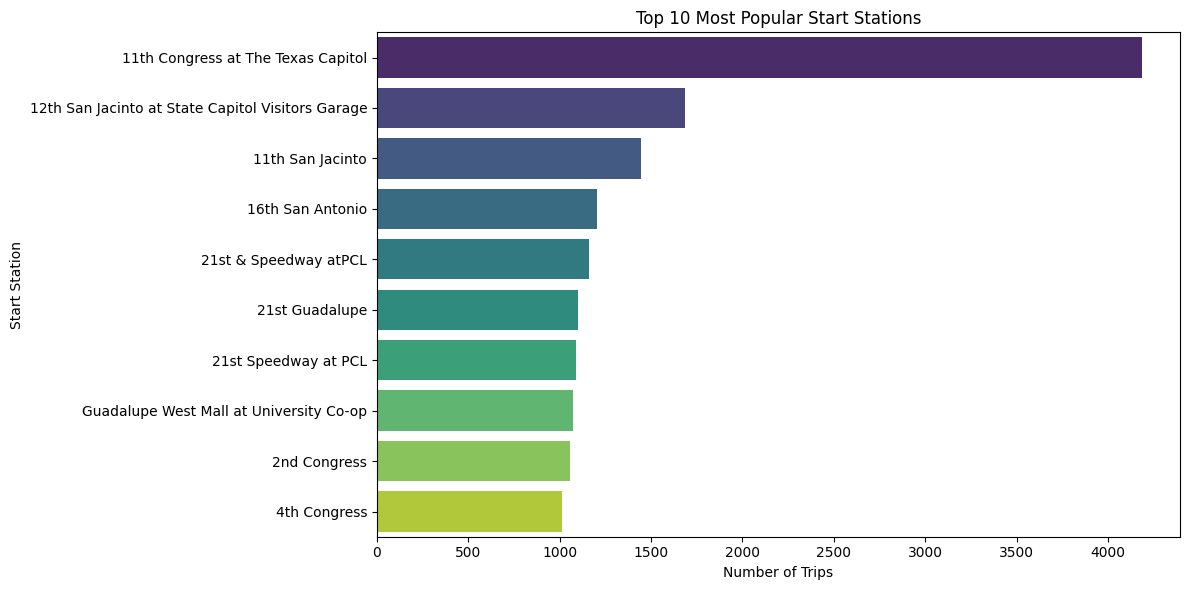

In [ ]:
# Visualizing popular stations
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(
    x=Popular_station.values,
    y=Popular_station.index,
    palette="viridis"
)
plt.title("Top 10 Most Popular Start Stations")
plt.xlabel("Number of Trips")
plt.ylabel("Start Station")
plt.tight_layout()
plt.show()


In [ ]:
# Getting the popular end stations
Popular_end_station = bikeshare_data_2['end_station_name'].value_counts().head(10)
Popular_end_station

,count
end_station_name,
11th Congress at The Texas Capitol,18645
16th San Antonio,7050
12th San Jacinto at State Capitol Visitors Garage,3704
11th San Jacinto,3379
17th & Guadalupe,3352
11th & San Jacinto,2775
10th Red River,2392
13th & San Antonio,1811
11th Salina,1560


/tmp/ipython-input-1266767836.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


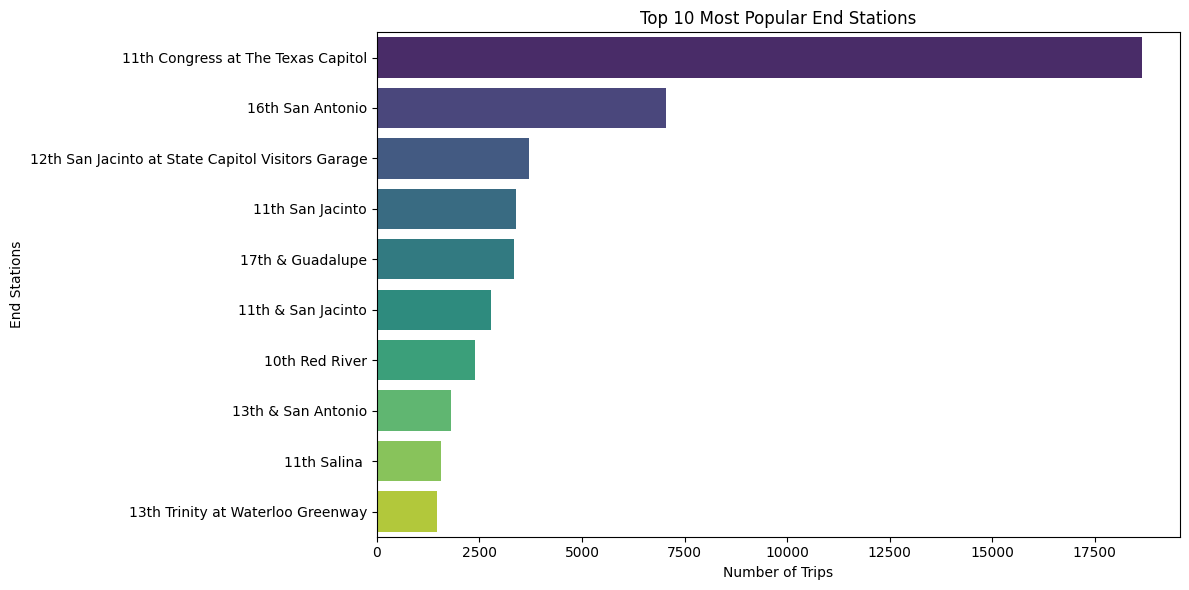

In [ ]:
# Visualizing popular end stations
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(
    x=Popular_end_station.values,
    y=Popular_end_station.index,
    palette="viridis"
)
plt.title("Top 10 Most Popular End Stations")
plt.xlabel("Number of Trips")
plt.ylabel("End Stations")
plt.tight_layout()
plt.show()


**Peak Hours Analysis**

. This analysis helps operations allocate bikes and rebalance stations during peak commuting periods.

In [ ]:
# Getting Peak Hours
peak_hours = bikeshare_data_2['start_hour'].value_counts().sort_index()
peak_hours.head()

,count
start_hour,
0,701
1,483
2,399
3,176
4,108


In [ ]:
peak_hours.sum()

np.int64(50000)

/tmp/ipython-input-2815280478.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


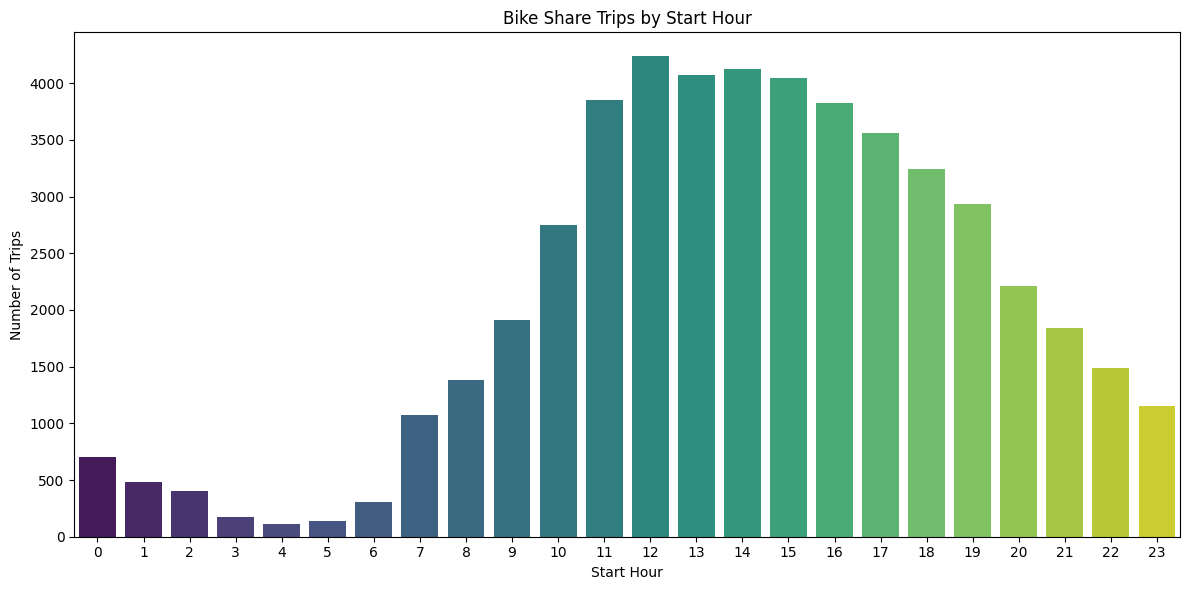

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(
    x=peak_hours.index,
    y=peak_hours.values,
    palette="viridis"
)
plt.title("Bike Share Trips by Start Hour")
plt.xlabel("Start Hour")
plt.ylabel("Number of Trips")
plt.tight_layout()
plt.show()

**Insight Generated From the Analysis**

*Categorizing Start hours*

. Early Morning Trips (0-6AM): This period shows low bike usage, with the absolute lowest being around 4-5AM.

. Morning Commute (7-9AM): This period shows significant pickup with the bike usage indicating a morning commute period, with the highest being around 9AM.

. Mid-Day Peak (10AM-3PM): This shows the busiest time in the bike usage. The usage peaks around 12PM to 2PM, suggesting lunch rides or leisure trips.

. Afternoon/Evening Commute (4-7PM): Activities here remain high but gradually decreases from the mid-day peak.

. Late Evening (8-11AM): Usage continues to decline as it gets later in the evening.

. Night (12-2AM): This period shows lower activity, similar to the early morning.

*Based on these observations, the start_hour column can be grouped into 'Morning peak', 'Mid_Day or Afternoon Peak', and 'Late Night Peak' with the mid-day or afternoon peak being the highest peak hour.

**Subscribers Usage Analysis**

. This analysis helps operations identify top subscribers.

In [ ]:
# Analyzing subscribers usage
subscriber_usage = bikeshare_data_2['subscriber_type'].value_counts()
subscriber_usage

,count
subscriber_type,
24 Hour Walk Up Pass,9030
Local365,8657
Local31,6119
Explorer,4890
Student Membership,4524
Pay-as-you-ride,2983
U.T. Student Membership,2741
Walk Up,2597
3-Day Weekender,2563


In [ ]:
# Top 10 Subscibers
top_10_subscribers = bikeshare_data_2['subscriber_type'].value_counts().head(10)
top_10_subscribers

,count
subscriber_type,
24 Hour Walk Up Pass,9030
Local365,8657
Local31,6119
Explorer,4890
Student Membership,4524
Pay-as-you-ride,2983
U.T. Student Membership,2741
Walk Up,2597
3-Day Weekender,2563


/tmp/ipython-input-291061803.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


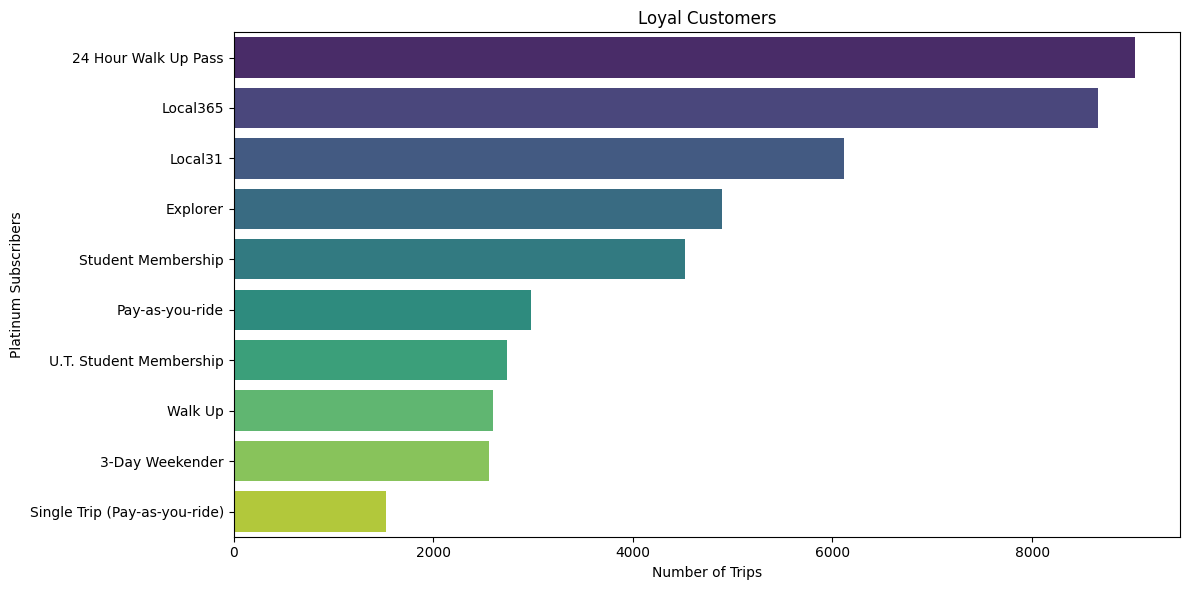

In [ ]:
# Visualizing the top 10 subscribers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_10_subscribers.values,
    y=top_10_subscribers.index,
    palette="viridis"
)
plt.title("Loyal Customers")
plt.xlabel("Number of Trips")
plt.ylabel("Platinum Subscribers")
plt.tight_layout()
plt.show()

**Days of Week Analysis**

. This analysis helps identify the busiest days in operations.

. And it can show when the system is used for commuting vs leisure.

/tmp/ipython-input-3524976737.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


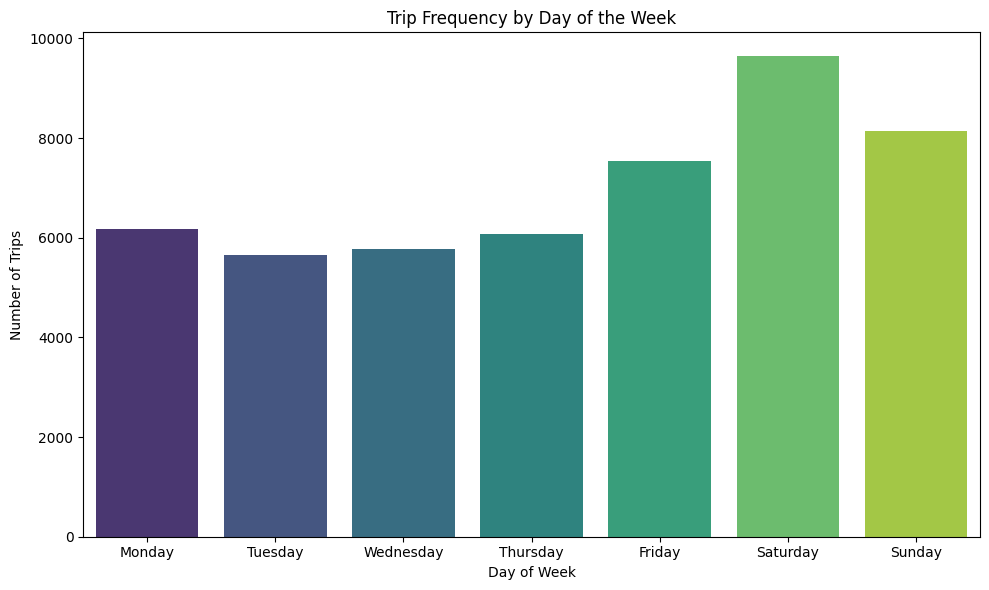

In [ ]:
# Visualizing Day-of-Week Patterns
# Grouping on Start Day
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.countplot(
    data=bikeshare_no_missing,
    x='start_day_of_week',
    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    palette='viridis'
)

plt.title("Trip Frequency by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Trips")
plt.tight_layout()
plt.show()

**Insight Generated from the Analysis**

. From the analysis, weekends show high trip counts, this can mean that the bikes are used more for leisures

**Seasonal variations**

. Seasonality helps plan maintenance and expansion.

/tmp/ipython-input-3810718490.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


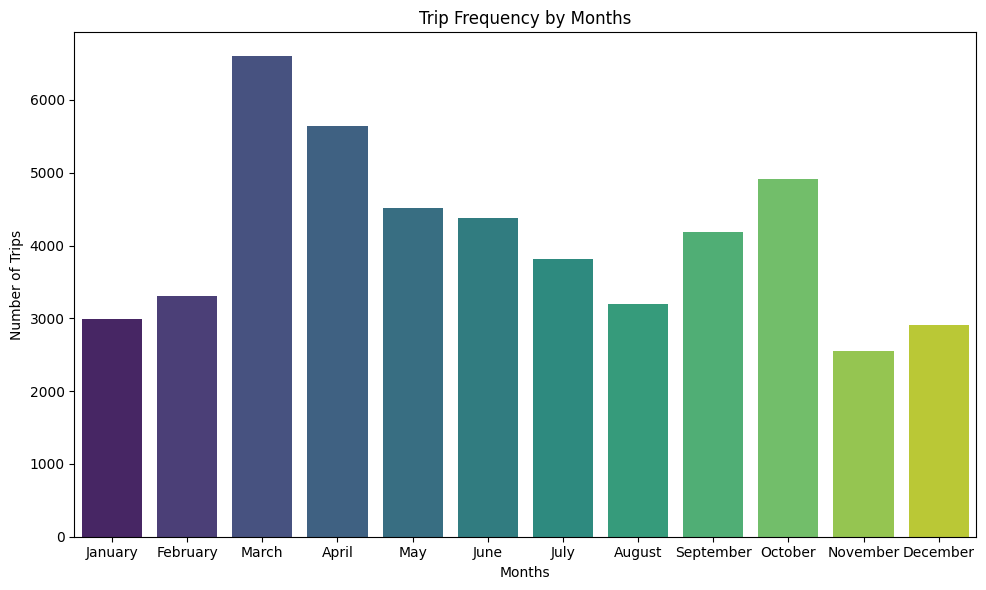

In [ ]:
# Visualizing Seasonal Variations
# Grouping on start_Month
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.countplot(
    data=bikeshare_no_missing,
    x='start_month',
    order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    palette='viridis'
)

plt.title("Trip Frequency by Months")
plt.xlabel("Months")
plt.ylabel("Number of Trips")
plt.tight_layout()
plt.show()


***Austin has long, hot summers (June-Aug) with intense heat, mild, short winters (Dec-Feb) with cool days and chilly nights, and pleasant, warm transition seasons in spring (Mar-May) and fall (Sep-Nov), making fall and spring the best times to visit for comfortable temperatures, while summer is oppressively hot and humid***

. The analysis shows high rise around the months of March, September, and October
. Fall in Austin is between the months of September - November with warm, pleasant and less humidity. This season shows cool temperature and is ideal for outdoor activities. This explains the rise in the analysis.
- Spring falls between the month of March - May with warm humidity.

**Yearly Patterns Analysis**

. This analysis shows the year with the highest trip counts in the dataset.

. The analysis shows that 2022 had the highest number of trips, with 9749 trip count.

In [40]:
yearly_pattern = bikeshare_data_2['start_year'].value_counts().sort_index()
yearly_pattern

,count
start_year,
2013,232
2014,4278
2015,3996
2016,2130
2017,2234
2018,3880
2019,3193
2020,4068
2021,8412


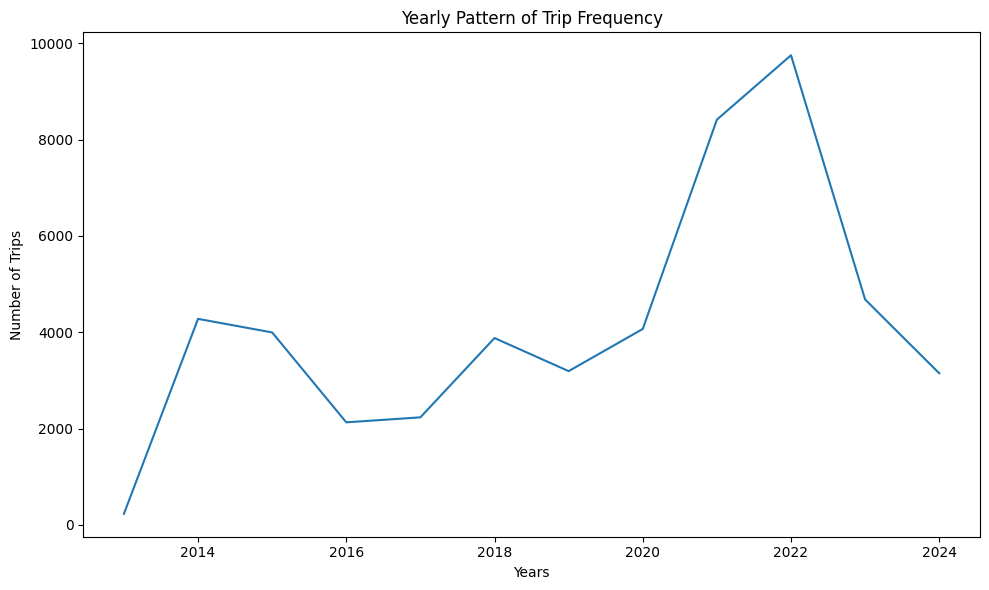

In [41]:
# Visualizing Yearly Pattern with line Graph
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.lineplot(
    x=yearly_pattern.index,
    y=yearly_pattern.values
)

plt.title("Yearly Pattern of Trip Frequency")
plt.xlabel("Years")
plt.ylabel("Number of Trips")
plt.tight_layout()
plt.show()

**Bike Fleet and Utilization Rates Analysis**

. This analysis help support maintenance scheduling and fleet optimization.



In [ ]:
# Bike Utilization Rates
bike_utilization_rate = bikeshare_data_2[['bike_id','bike_type']].value_counts().head(20)
bike_utilization_rate

,,count
bike_id,bike_type,
19148,electric,132
19239,electric,123
19688,electric,122
19110,electric,121
19675,electric,120
17374,electric,116
16946,electric,115
18331,electric,115
19739,electric,114


,,count
bike_id,bike_type,
19148,electric,132
19239,electric,123
19688,electric,122
19110,electric,121
19675,electric,120
17374,electric,116
16946,electric,115
18331,electric,115
19739,electric,114


In [42]:
# Bike Type Performance
bike_type_performance = bikeshare_data_2['bike_type'].value_counts()
bike_type_performance

,count
bike_type,
electric,25703
classic,24297


/tmp/ipython-input-2460103354.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

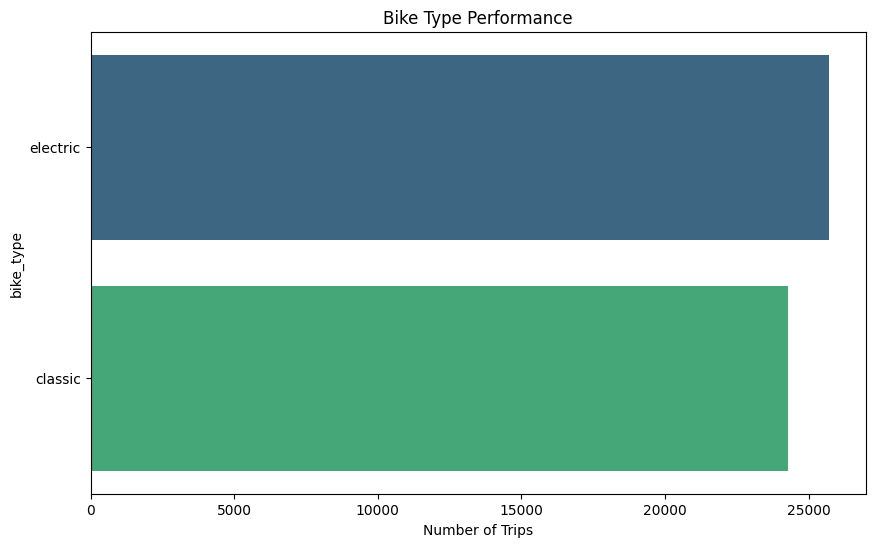

In [43]:
# Visualizing Bike Type Performance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.barplot(
    x=bike_type_performance.values,
    y=bike_type_performance.index,
    palette="viridis"
)

plt.title("Bike Type Performance")
plt.xlabel("Number of Trips")
plt


**The Bike Type Performance Analysis shows that electric bikes have more trip counts than classic bikes**

. This shows that more investment and maintenance are needed for electric bikes.

. Users can also be encouraged to try out the features of classic bikes.

## Reflections
. How the business problem influenced the wrangling decisions.

- As a data analyst, understanding business problems is crucial to analysis, as it helps make data-driven decisions.
- The business problem in this dataset helped define specific metrics that are used to measure data initiative success (peak rush hour, bike fleets and utilization rates, yearly analysis patterns, etc.).
- Without a well-defined business problem, a data analyst would be going in circles without solving any problem. 

## Key Insights

- **Popular Stations:** A small number of stations account for a disproportionately high number of trips, indicating strong location-based demand.
- **Peak Hours:** Bike usage peaks during weekday morning and evening hours, suggesting commuter-driven usage.
- **Subscriber Usage:** Subscribers consistently use the service more frequently than casual users, showing stable and predictable demand.
- **Days of the Week:** Weekend usage exceeds weekday usage, reinforcing the role of bike-sharing for leisure.
- **Seasonal Variations:** Usage increases during favorable weather seasons and declines during colder or rainy periods.
- **Yearly Trends:** Overall usage shows growth over time, reflecting increasing adoption of the bike-sharing service.
- **Fleet Utilization:** Some bikes and stations are underutilized, indicating opportunities for redistribution and efficiency improvements.

## Business Recommendations

- Increase bike availability at high-demand stations during peak commute hours.
- Optimize fleet redistribution to reduce congestion at popular stations and improve usage at underperforming locations.
- Develop targeted subscription campaigns to convert casual users into long-term subscribers.
- Use seasonal demand patterns to inform maintenance scheduling and capacity planning.
- Monitor yearly usage trends to support data-driven expansion and infrastructure investment.
